In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
import scipy.stats as stat
from PIL import Image
from matplotlib.animation import FuncAnimation
import cv2

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

# Méthodes par énergie et applications en image

### Partir d'un constat simple:
 Souvent, résoudre un problème directement est très dur, par contre, il est souvent simple de savoir à quel point on est loin de la solution

### Energie:
fonction qui associe, à une configuration donnée, une mesure d'à quel point elle échoue à résoudre le problème.

# Exemple: plus court chemin entre deux points

On sait décrire ce qu'on voudrait être le plus petit possible, ici, la longueur de la courbe:
$$
E(\gamma) = \sum_{i=0}^n ||\gamma_{i+1}-\gamma_{i}||^2 \\
\gamma_0 = a \\
\gamma_n = b
$$


In [2]:
N = 30
s = 0.2
gammax = np.array([i/(N-1) for i in range(N)])
gammay = gammax + stat.norm.rvs(size=N)*s
gammay[0] = 0
gammay[-1] = 1

lap = 2*np.eye(N) - np.eye(N,k=1) - np.eye(N,k=-1)
lap[0] = 0
lap[-1] = 0
#print(lap)
dt = 0.1
T = 100
def init_curve():
    global gammax,gammay,N,s
    gammax = np.array([i/(N-1) for i in range(N)])
    gammay = gammax + stat.norm.rvs(size=N)*s
    gammay[0] = 0
    gammay[-1] = 1
    
def minimiser_energie():
    global gammax,gammay,dt,lap
    gammax -= dt*lap@gammax
    gammay -= dt*lap@gammay


<IPython.core.display.Javascript object>


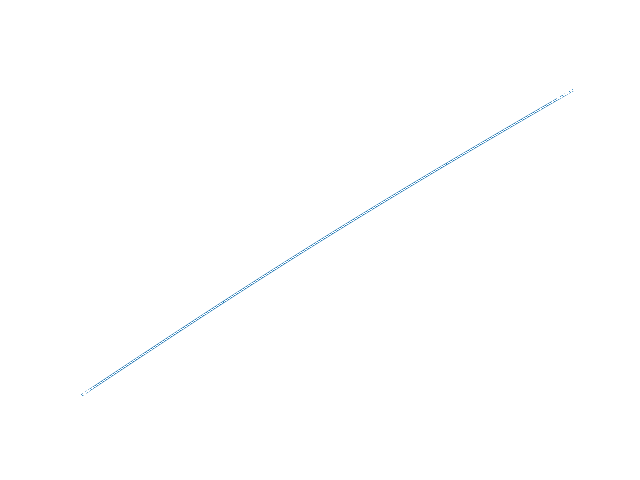

In [3]:
fig, ax = plt.subplots();ax.set_xlim(0,1);ax.set_ylim(-0.1,1.1);line, = ax.plot(gammax,gammay)
ax.plot()
def update(frame):
    minimiser_energie();line.set_data(gammax, gammay);return line,
init_curve();ani = FuncAnimation(fig, update, frames=100,interval=600,blit=True);
plt.show()

<h1 style="text-align: center;">La question maintenant: comment minimiser l'énergie?</h1>


Bien que ce soit surprenant, l'optimisation continue est incroyablement plus simple que l'optimisation discrète !

<img src="opti_discrete.png" style="display: block;float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="">

<h1 style="text-align: center;">La question maintenant: comment minimiser l'énergie?</h1>


Bien que ce soit surprenant, l'optimisation continue est incroyablement plus simple que l'optimisation discrète !

<img src="opti_discrete.png" style="display: block; float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="">
<img src="opti_continous.png" style="display: block; float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="">

### Pourquoi est-ce plus simple? Le calcul différentiel!
La notion de dérivée contient énormément d'information sur l'aspect local de notre fonction autour du point actuel.

<h1 style="text-align: center;">Qu'est ce qu'est vraiment une dérivée?</h1>

<img src="Tangent.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="500" height="500">


Il faut le voir dans le sens inverse, si vous connaissez la dérivée en un point d'une fonction, vous savez à quoi elle ressemble localement! 

## Développement limité
idée: approchez localement une fonction par une fonction simple (un polynôme) 
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + ...
$$

autrement dit, à partir du moment où une fonction est dérivable, elle ne peut pas être "trop" compliquée!

Donc on sait dans quel direction aller pour minimiser la fonction!

## En dimension supérieure: le gradient

$$
\nabla f(x)_i = \frac{\partial f(x)}{\partial x_i}
$$

Donne la direction de plus forte augmentation

<img src="gradient.png" style="display: block; float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="">
<img src="tangent_plane.jpg" style="display: block; float:center;
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="">

## Premier algorithme de minimisation
### Descente de Gradient à pas fixe

$$
x_{n+1} = x_n - \alpha \nabla f(x_n)
$$

$\alpha$ un paramètre à fixer, mérite une étude approfondie



Très simple, générique, mais convergence lente!

Par exemple: c'est la base des réseaux de neurones!

## Le fond du trou

Reprendre l'exemple de XU qui fait du snowboard
$$
    f(x) = x^2 \\
    \nabla f(x) = 2x \\
    \text{ donc la descente de gradient donne : } x_{n+1} = x_n - \alpha 2x_n
$$


<IPython.core.display.Javascript object>


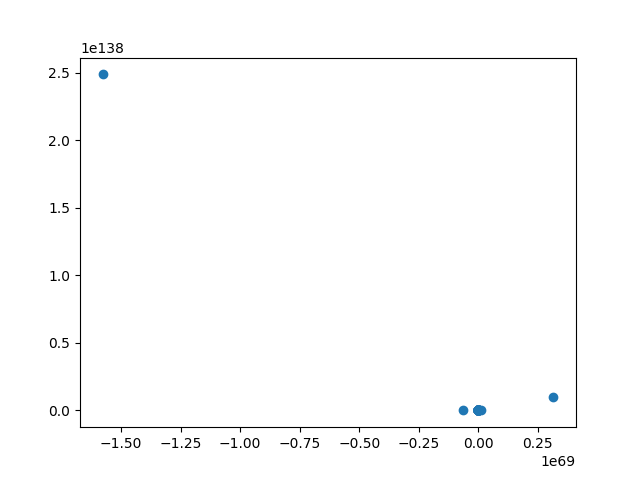

In [6]:
f = lambda x : x*x
x = 1
X = []
alpha = 3
for i in range(100):
    X.append(x)
    x -= alpha*2*x
X = np.array(X)
plt.scatter(X,f(X))
plt.show()

## 1er exemple: débruitage d'une image

Une image bruitée est une image qui varie beaucoup localement:

On peut mesurer la variation locale de l'image en $(x,y)$ par $||\nabla I(x,y)||^2$
qui aboutit à l'énergie
$$
    E(I) = \int_{\Omega} ||\nabla I(x,y)||^2 dxdy
$$

On trouve comme gradient
$$
    \nabla E (I) = -\Delta I
$$

## Un mot sur le laplacien
c'est une mesure de la cohérence locale d'une fonction, à quel point une fonction en un point ressemble à ses voisins.

Si on le discrétise:
$$
    \Delta I(x,y) = \frac{I_{x+1,y} + I_{x-1,y} + I_{x,y+1} + I_{x,y-1}}{4} - I_{x,y} \\
                   \frac{I_{x+1,y} + I_{x-1,y} + I_{x,y+1} + I_{x,y-1} - 4 I_{x,y}}{4}
$$

Vous l'avez peut-être déjà rencontré, c'est ce filtre:

<img src="lap_filter.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “”>

On applique la descente de gradient:
$$
    I^{n+1} = I^n +\alpha \Delta I^n
$$

In [4]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

img = cv2.cvtColor(cv2.imread('lena.png'),cv2.COLOR_BGR2GRAY)
lena = cv2.resize(img, dsize=(300, 300), interpolation=cv2.INTER_CUBIC)/255

W,H = lena.shape

mu_or = lena.sum()/(W*H)
sig_or = np.sqrt(((lena-mu_or)**2).sum()/(W*H))

noise = [np.random.normal(0,0.1,W) for j in range(H)]
lena_noise = (lena + noise).clip(0,1)


def toImg(I):
    return (255*I).astype(np.uint8)

def lap(i,j,I):
    if i == 0 or i == W-1 or j == 0 or j == H-1:
        return 0
    return I[i+1,j] + I[i-1,j]+ I[i,j-1]+ I[i,j+1]-4*I[i,j]

def normalize(I):
    return cv2.equalizeHist(toImg(I.clip(0,1)))
    
def heat(I,dt):
    L = np.array([[lap(j,i,I) for i in range(W)] for j in range(H)])
    return I + dt*L

<IPython.core.display.Javascript object>


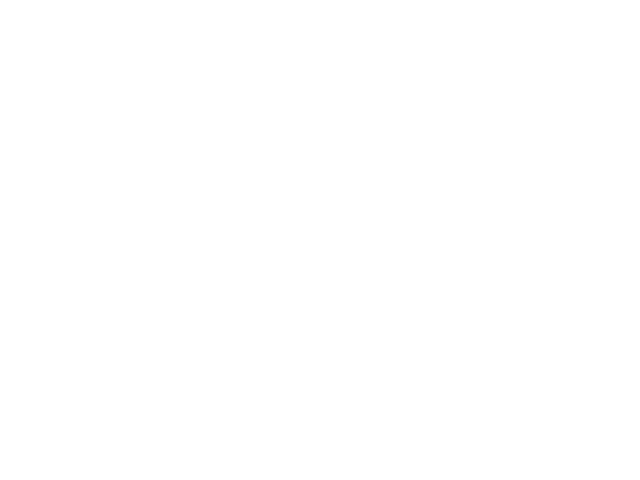

In [5]:
fig, ax = plt.subplots(1,3);
ax[0].imshow(lena,cmap="gray")
ax[1].imshow(lena_noise,cmap="gray")
I = lena_noise
for i in range(100):
    I = heat(I,0.02)
im_plt = ax[2].imshow(I,cmap="gray")

<img src="denoise.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="" height="1200">


##  Intuitivement, que fait ce débruitage?
$$
    I^{n+1} = I^n +\alpha \Delta I^n \\
    I^{n+1}_{x,y} = I^n_{x,y} + \alpha (\frac{I^n_{x+1,y} + I^n_{x-1,y} + I^n_{x,y+1} + I^n_{x,y-1}}{4} - I^n_{x,y}) \\
$$
A chaque instant, la couleur de chaque pixel se rapproche de la couleurs de ses voisins

## L'équation de la chaleur
$$
    \frac{\partial I}{\partial t} = \Delta I
$$

L'équation eux dérivées partielles (EDP) la plus connue, extrêmement utilisée pour ses propriétés régularisantes.


C'est un fait connu, la solution de l'équation de la chaleur est la convolution avec une gaussienne de plus en plus large:
$$
I(x,t) \propto I_0(x)\ast exp(-\frac{x^2}{t})
$$

## On retrouve le flou gaussien!

## 2ème exemple: Application à la détection de contour

On cherche une courbe qui va entourer une forme dans une image le long de son contour.

Compliqué à résoudre directement, essayons avec une méthode par énergie!


Trois critères pertinants pour un "bon" contour:
- la plus courte possible
- la plus "simple" possible
- qui passe le contour de l'image!

## Traduction de nos critères dans une énergie

$$
E(\gamma) = \int_0^1 \alpha ||\dot{\gamma}(t)||^2 + \beta ||\ddot{\gamma}(t)||^2 + \zeta V(\gamma(t)) dt
$$

où $V(x)$ est une qui fonction qui est grande dans les zones où il n'y a surement pas de contours.

par exemple:
$$
V(x) = \frac{1}{1+||\nabla I(x)||}
$$
Où $I$ est l'intensité lumineuse de l'image. 

On peut prouver que le "gradient" de cette énergie est
$$
\nabla E(\gamma) = \alpha\ddot{\gamma} + \beta \ddddot{\gamma} + \zeta  \nabla V(\gamma)
$$
Démo!

## Mais donc ça y est, on a fini la science?

Heureusement non! La bête noir de l'optimisation sont les mimimums locaux, un algorithme local comme la descente de gradient n'est pas capable de les detecter/éviter!
<img src="Minimum-local-et-global.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="600" height="600"> 

## Eviter les minimums locaux

Introduire une inertie dans la descente

<img src="nesterov.gif" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “”>

### Résumé méthodes par énergie:
Pour résoudre un problème mal posé:
- Définir une énergie, la plus simple possible, qui pénalise les comportements qu'on souhaite éviter
- Appliquer un algorithme de minimisation à partir d'un état initial pour se rapprocher d'une solution locale.

Applications immenses car très simple et générique:
- Base des réseaux de neurones
- Très commun en image/traitement de la géométrie

Défault:
- Pas toujours possible de définir une énergie pertiante/facile à minimiser

## Introduction au transport optimal

<img src="discrete_OT1.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="600" height="600">
$$
P_{i,j} \text{ quantité de matière envoyée de i vers j || } C_{i,j} \text{ cout de transport entre i et j} \\
\min_{P \in \Omega} \sum_{i=1}^n \sum_{j=1}^n P_{i,j} C_{i,j}
$$

## La solution est un appariment 2 à 2
<img src="discrete_OT2.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="600" height="600">
$$
P_{i,j} \text{ quantité de matière envoyée de i vers j || } C_{i,j} \text{ cout de transport entre i et j} \\
\min_{P \in \Omega} \sum_{i=1}^n \sum_{j=1}^n P_{i,j} C_{i,j}
$$

## Utilisations très vaste en image:
Exemple:
Trouver l'appariment entre les pixels de deux images
<img src="image_map.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="1300" height="1300">

## La distance de Wasserstein et Machine Learning

La distance de Wasserstein est une distance entre deux objets:

$$
\mathcal{W}(A,B) = \text{cout optimal du transport de A vers B}
$$


Apport massif au machine learning, car un réseau de neurones "classifier" représente une densité de probabilité.

<img src="wasserstein.png" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="900" height="900">

## Wasserstein-GAN

se servir de la distance de Wasserstein pour discriminer plus finement les images

<img src="gan_diagram.svg" style="display: block; 
           margin-left: auto;
           margin-right: auto;" alt= “” width="900" height="900">

## Interpolation barycentrique

Chercher la forme qui est à équidistance d'un canard d'un tore et d'une vache?

<img src="W_bary.png" style="display: block; float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="800" height="800">
<img src="bary_shapes.jpg" style="display: block; float:left;
           margin-left: auto;
           margin-right: auto;" alt= “” width="800" height="800">

# Conclusion
## Chercher à minimiser une énergie/un effort est une idée extrêmement naturelle et féconde 

### Et donc, pour minimiser l'effort à fournir pour résoudre un problème, faites des maths ^^